In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/vaibhav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df = pd.read_csv('/home/vaibhav/Desktop/AI/Real Estate Price Prediction/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Data Cleaning

In [4]:
df = df.drop(labels = ['No'], axis = 1)

In [5]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Removing Outlier
#### From above graph can be seen Y with value 117.5 is an outlier

In [10]:
max(df['Y house price of unit area'])
df = df[df['Y house price of unit area'] != 117.5]

### Plotting features with the target variable


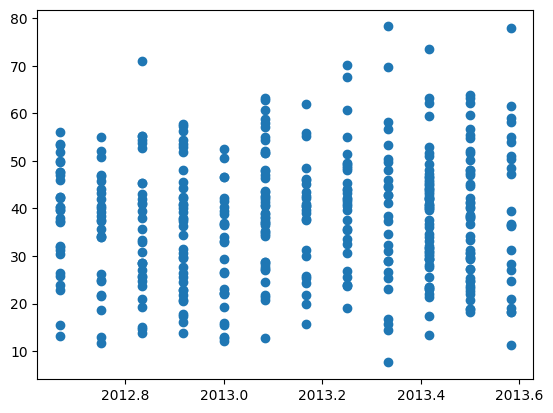

In [12]:
plt.scatter(df['X1 transaction date'], df['Y house price of unit area'])

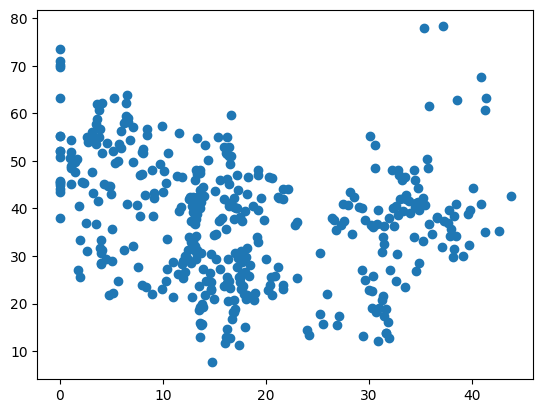

In [13]:
plt.scatter(df['X2 house age'], df['Y house price of unit area'])

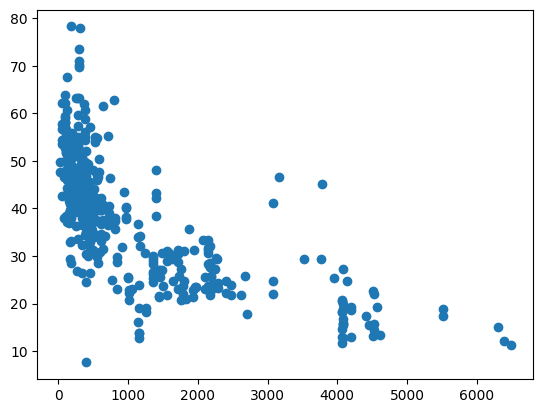

In [14]:
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'])

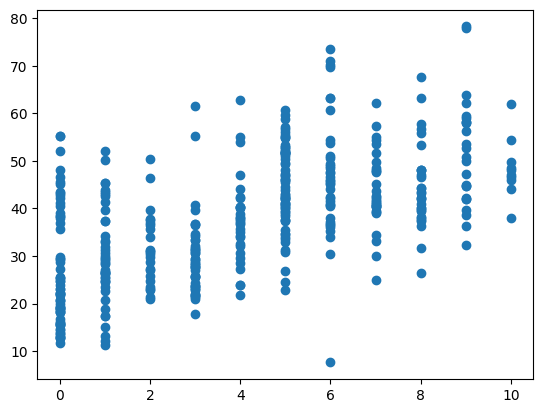

In [15]:
plt.scatter(df['X4 number of convenience stores'], df['Y house price of unit area'])

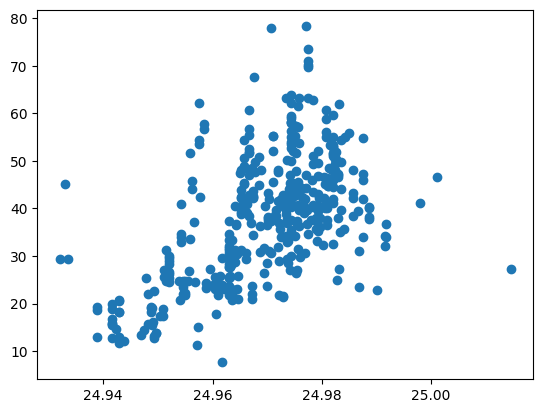

In [16]:
plt.scatter(df['X5 latitude'], df['Y house price of unit area'].values)

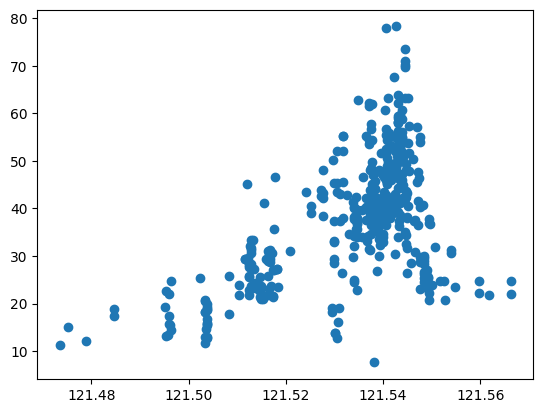

In [17]:
plt.scatter(df['X6 longitude'], df['Y house price of unit area'].values)

### Z-Score Normalization acroos the board

In [19]:
columns = df.columns
for i, column in enumerate(columns):
    if i == len(columns) - 1:
        break
    mean = df[column].mean()
    stddev = df[column].std()
    for row in range(0, df[column].size):
        df.iloc[row, i] = np.float64((df.iloc[row, i] - mean) / stddev)
# We can see after normalizing it does no the change the way Y corrleates to the features

/tmp/ipykernel_9348/527169816.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.0026960602519495' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[row, i] = np.float64((df.iloc[row, i] - mean) / stddev) + 2


### -5 to 5


In [26]:
columns = df.columns
for i, column in enumerate(columns):
    if i == len(columns) - 1:
        break
    old_min = df[column].min()
    old_max = df[column].max()
    for row in range(0, df[column].size):
        normalized_value = -2 + ((df.iloc[row, i] - old_min) / (old_max - old_min)) * 4
        df.iloc[row, i] = np.float64(normalized_value)

### Splitting Data

In [27]:
m, n = df.shape
split = int(0.8 * m)
train = df[:split]
test = df[split:]
train.to_csv('train1.csv', index = False)
test.to_csv('test1.csv', index = False)